In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv('NFLX.csv')

In [159]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [160]:
df.shape

(1009, 7)

In [161]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [162]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [163]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [164]:
data = pd.DataFrame(df[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


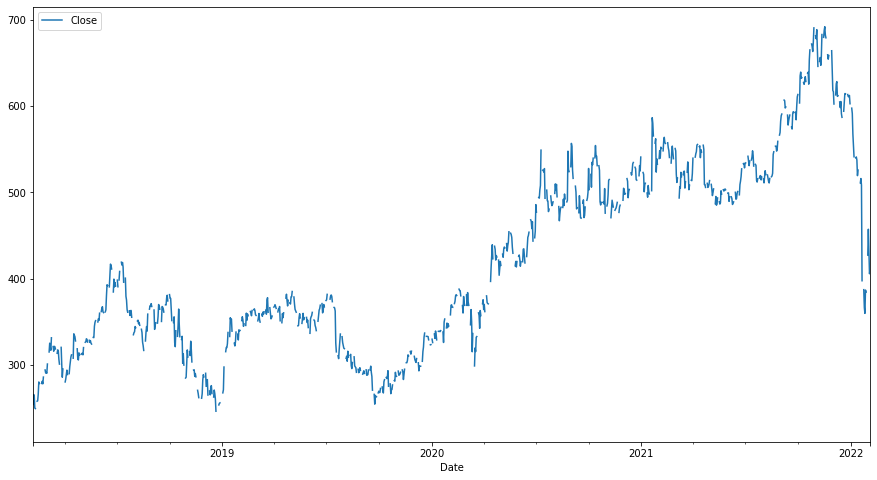

In [165]:
data.plot(figsize=(15,8))

In [166]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [167]:
df['date_year'] = df.Date.dt.year

In [168]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date_year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018


In [169]:
df['date_month'] = df.Date.dt.month

In [170]:
df['date_day'] = df.Date.dt.day

In [171]:
X = df.drop(['Date', 'Close'], axis=1)

In [172]:
X.head()

,Open,High,Low,Adj Close,Volume,date_year,date_month,date_day
0,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9


In [173]:
y = df['Close']

In [174]:
y.head()

0    254.259995
1    265.720001
2    264.559998
3    250.100006
4    249.470001
Name: Close, dtype: float64

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings("ignore")

In [177]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
best_estimators = {}

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train,y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        best_estimators[algo_name] = gs.best_estimator_

    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train, y_train)

,model,best_score,best_params
0,linear_regression,1.000000,{'normalize': True}
1,lasso,0.999935,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.999592,"{'criterion': 'mse', 'splitter': 'best'}"


In [178]:
best_estimators['linear_regression'].score(X_test, y_test)

1.0

In [180]:
best_estimators['lasso'].score(X_test, y_test)

0.9999283070092412

In [179]:
best_estimators['decision_tree'].score(X_test, y_test)

0.9996966757229173

**Now Using Linear Regression**

In [181]:
y_pred = best_estimators['linear_regression'].predict(X_test)

In [182]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   
print("Results: ----------------")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results: ----------------
MAE: 1.2100331737696756e-13
MSE: 2.385790307129565e-26
RMSE: 1.5446003713354354e-13


**Now Using Lasso Regression**

In [184]:
y_pred = best_estimators['lasso'].predict(X_test)

In [185]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   
print("Results: ----------------")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results: ----------------
MAE: 0.6302720257297256
MSE: 0.9354190423558838
RMSE: 0.9671706376621882


**Now Using Decision Tree Regression**

In [186]:
y_pred = best_estimators['decision_tree'].predict(X_test)

In [187]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   
print("Results: ----------------")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results: ----------------
MAE: 0.8322282326732692
MSE: 3.95764358257201
RMSE: 1.9893827139522475
